## MNIST Basic Approach (SoftMaxt)

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [13]:
single_image = mnist.train.images[0].reshape(28,28)


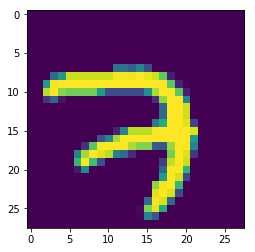

In [14]:
plt.imshow(single_image)

In [16]:
## Placeholders
x = tf.placeholder(tf.float32, shape = [None, 784])

In [19]:
# Variables (Weights and Biases)
w = tf.Variable(tf.zeros([784,10]))  ## BECAUSE WE HAVE 784 IMAGES WITH 10 POSSIBLE LABELS 
b = tf.Variable(tf.zeros([10])) 

In [21]:
# Create Graph function
y = tf.matmul(x,w) + b

In [23]:
# Loss Function
y_true = tf.placeholder(tf.float32, [None, 10])

In [24]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits = y))

In [26]:
#Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.5)
train = optimizer.minimize(cross_entropy)

In [27]:
#Create Session
init = tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x:batch_x, y_true: batch_y})